<a href="https://colab.research.google.com/github/hasby-umutoniwabo/Colab/blob/main/Umutoniwabo_Hasbiyallah_PCA_African_Economic_Crisis_formative2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub -q

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
print("Setup complete")

Setup complete


In [ ]:
#Africa Economic Crisis dataset
import kagglehub
path = kagglehub.dataset_download("chirin/africa-economic-banking-and-systemic-crisis-data")

#load CSV file
import os
csv_file = os.path.join(path, "african_crises.csv")
df_raw = pd.read_csv(csv_file)

print(f"Shape: {df_raw.shape}")
print(f"Columns ({len(df_raw.columns)}): {list(df_raw.columns)}")
df_raw.head()

100%|██████████| 13.7k/13.7k [00:00<00:00, 18.3MB/s]

Extracting files...
Shape: (1059, 14)
Columns (14): ['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises', 'banking_crisis']


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
#Identify numeric vs non-numeric columns
print("=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df_raw.dtypes)

#separate numeric and non numeric columns
non_numeric_cols = df_raw.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nNon-numeric columns ({len(non_numeric_cols)}): {non_numeric_cols}")
print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")

#Check for missing values in the raw data
print("\n" + "=" * 60)
print("MISSING VALUES (raw data)")
print("=" * 60)
print(df_raw.isnull().sum())
print(f"\nTotal missing: {df_raw.isnull().sum()}")

DATA TYPES
case                                 int64
cc3                                 object
country                             object
year                                 int64
systemic_crisis                      int64
exch_usd                           float64
domestic_debt_in_default             int64
sovereign_external_debt_default      int64
gdp_weighted_default               float64
inflation_annual_cpi               float64
independence                         int64
currency_crises                      int64
inflation_crises                     int64
banking_crisis                      object
dtype: object

Non-numeric columns (3): ['cc3', 'country', 'banking_crisis']
Numeric columns (11): ['case', 'year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises']

MISSING VALUES (raw data)
case                               0
cc3       

In [ ]:
df = df_raw.copy()
np.random.seed(42)
df.loc[np.random.random(len(df))<0.08, 'exch_usd'] = np.nan
df.loc[np.random.random(len(df))<0.12, 'inflation_annual_cpi'] = np.nan
df.loc[np.random.random(len(df))<0.05, 'gdp_weighted_default'] = np.nan

#check missing values now exist
print("MISSING VALUES AFTER INTRODUCING REALISTIC GAPS")
print("=" * 60)
print(df.isnull().sum())
print(f"\nTotal missing: {df.isnull().sum().sum()}")

MISSING VALUES AFTER INTRODUCING REALISTIC GAPS
case                                 0
cc3                                  0
country                              0
year                                 0
systemic_crisis                      0
exch_usd                            89
domestic_debt_in_default             0
sovereign_external_debt_default      0
gdp_weighted_default                58
inflation_annual_cpi               131
independence                         0
currency_crises                      0
inflation_crises                     0
banking_crisis                       0
dtype: int64

Total missing: 278


In [ ]:
#unique values of non-numeric columns
for col in non_numeric_cols:
  print(f"{col}: {df[col].nunique()} unique -> {df[col].unique()[:5]}")
  print()

  #encode 'banking_crisis'
  df['banking_crisis_encoded'] = df['banking_crisis'].map({'crisis':1, 'no_crisis': 0})

  #each country gets a number
  countries = sorted(df['country'].unique())
  country_map={c: i for i, c in enumerate(countries)}
  df['country_encoded'] = df['country'].map(country_map)

  #drop original non-numeric columns
  df_processed = df.drop(columns=['cc3', 'country', 'banking_crisis'])

  print("After encoding: ")
  print(f"Columns: {list(df_processed.columns)}")
  print(f"Shape: {df_processed.shape}")

  #impute missing values with median
  print("\nIMPUTATION:")
  for col in df_processed.columns:
    n_missing = df_processed[col].isnull().sum()
    if n_missing > 0:
      median_val = df_processed[col].median()
      df_processed[col].fillna(median_val, inplace=True)
      print(f" {col}: {n_missing} NaN -> filled with median = {median_val:.4f}")

  print(f"\nMissing after imputation: {df_processed.isnull().sum().sum()}")
  df_processed.head()

cc3: 13 unique -> ['DZA' 'AGO' 'CAF' 'CIV' 'EGY']

After encoding: 
Columns: ['case', 'year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises', 'banking_crisis_encoded', 'country_encoded']
Shape: (1059, 13)

IMPUTATION:
 exch_usd: 89 NaN -> filled with median = 0.9015
 gdp_weighted_default: 58 NaN -> filled with median = 0.0000
 inflation_annual_cpi: 131 NaN -> filled with median = 5.8780

Missing after imputation: 0
country: 13 unique -> ['Algeria' 'Angola' 'Central African Republic' 'Ivory Coast' 'Egypt']

After encoding: 
Columns: ['case', 'year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises', 'banking_crisis_encoded', 'country_encoded']
Shape: (1059, 13)

IMPUTATION:
 exch_usd: 89 NaN -> fi

In [ ]:
#PCA 1: Standardize
X = df_processed.values.astype(float)
feature_names = list(df_processed.columns)
X_mean = np.mean(X, axis=0)
X_std_dev = np.std(X, axis=0, ddof=0)
X_std_dev[X_std_dev == 0] = 1.0

X_standardized = (X - X_mean) / X_std_dev

print("Standardization complete: ")
print(f"Shape: {X_standardized.shape}")
print(f"Mean per feature (should be ~0): {np.round(X_standardized.mean(axis=0), 6)}")
print(f"Std per feature (should be ~1): {np.round(X_standardized.std(axis=0), 4)}")

Standardization complete: 
Shape: (1059, 13)
Mean per feature (should be ~0): [ 0. -0.  0.  0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
Std per feature (should be ~1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#PCA 2: Covariance Matrix
n_samples = X_standardized.shape[0]
cov_matrix = (1 / n_samples) * (X_standardized.T @ X_standardized)
print(f"Covariance matrix shape: {cov_matrix.shape}")

Covariance matrix shape: (13, 13)


In [ ]:
#PCA 3: Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

#sort eigenvalues descending(highes variance first)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("\nEIGENVALUES (sorted descending): ")
print("=" * 40)
for i, ev in enumerate(eigenvalues):
  print(f"PC{i+1}: λ = {ev:.6f}")

print(f"\nSum of eigenvalues: {np.sum(eigenvalues):.4f}")
print(f"Number of features: {len(eigenvalues)}")
print("(Sum ~ number of features confirms correct standardization)")


EIGENVALUES (sorted descending): 
PC1: λ = 2.801218
PC2: λ = 2.149828
PC3: λ = 1.389836
PC4: λ = 1.310276
PC5: λ = 1.092513
PC6: λ = 1.008807
PC7: λ = 0.937842
PC8: λ = 0.779423
PC9: λ = 0.583171
PC10: λ = 0.519373
PC11: λ = 0.287412
PC12: λ = 0.132335
PC13: λ = 0.007966

Sum of eigenvalues: 13.0000
Number of features: 13
(Sum ~ number of features confirms correct standardization)


In [ ]:
#PCA 4: Explained variance

explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

print("EXPLAINED VARIANCE PER COMPONENT")
print("=" * 60)
print(f"{'PC':<6} {'Eigenvalue':<14} {'Variance %':<14} {'Cumulative %':<14}")
print("-" * 60)
for i in range(len(eigenvalues)):
  print(f"PC{i+1:<4} {eigenvalues[i]:<14.6f} {explained_variance_ratio[i]*100:<14.2f} {cumulative_variance[i]*100:<14.2f}")


EXPLAINED VARIANCE PER COMPONENT
PC     Eigenvalue     Variance %     Cumulative %  
------------------------------------------------------------
PC1    2.801218       21.55          21.55         
PC2    2.149828       16.54          38.08         
PC3    1.389836       10.69          48.78         
PC4    1.310276       10.08          58.86         
PC5    1.092513       8.40           67.26         
PC6    1.008807       7.76           75.02         
PC7    0.937842       7.21           82.23         
PC8    0.779423       6.00           88.23         
PC9    0.583171       4.49           92.71         
PC10   0.519373       4.00           96.71         
PC11   0.287412       2.21           98.92         
PC12   0.132335       1.02           99.94         
PC13   0.007966       0.06           100.00        


In [ ]:
#PCA 5: Project onto first 2 PCs for visualization
k=2
V_k = eigenvectors[:, :k]
X_pca = X_standardized @ V_k

print(f"\nOriginal shape: {X_standardized.shape}")
print(f"Projected shape: {X_pca.shape}")
print(f"\nVariance retained with {k} PCs: {cumulative_variance[k-1]*100:.2f}%")


Original shape: (1059, 13)
Projected shape: (1059, 2)

Variance retained with 2 PCs: 38.08%


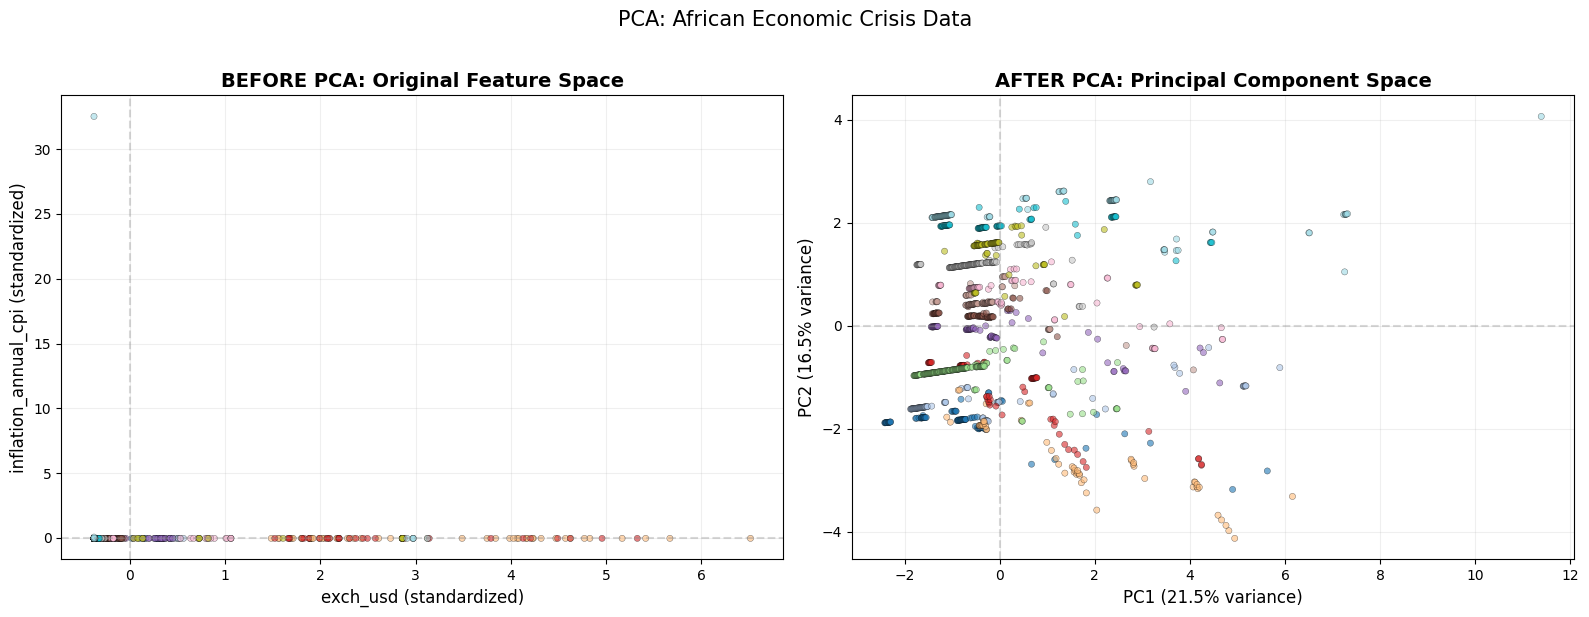

Points before: 1059
Points after: 1059
-> Same number of data points preserved


In [ ]:
#Visualization: Before and After PCA
fig, axes = plt.subplots(1,2,figsize=(16,6))
country_codes = df_processed['country_encoded'].values

#Before PCA
feat_x = feature_names.index('exch_usd')
feat_y = feature_names.index('inflation_annual_cpi')

axes[0].scatter(
    X_standardized[:, feat_x], X_standardized[:, feat_y],
    c=country_codes, cmap='tab20', alpha=0.6, s=20, edgecolors='k', linewidths=0.3
)
axes[0].set_xlabel('exch_usd (standardized)', fontsize=12)
axes[0].set_ylabel('inflation_annual_cpi (standardized)', fontsize=12)
axes[0].set_title('BEFORE PCA: Original Feature Space', fontsize=14, fontweight='bold')
axes[0].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[0].axvline(x=0, color='gray', linestyle='--', alpha=0.3)
axes[0].grid(True, alpha=0.2)

#After PCA
axes[1].scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=country_codes, cmap='tab20', alpha=0.6, s=20, edgecolors='k', linewidths=0.3
)
axes[1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)', fontsize=12)
axes[1].set_title('AFTER PCA: Principal Component Space', fontsize=14, fontweight='bold')
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1].axvline(x=0, color='gray', linestyle='--', alpha=0.3)
axes[1].grid(True, alpha=0.2)

plt.suptitle('PCA: African Economic Crisis Data', fontsize=15, y=1.02)
plt.tight_layout()
plt.show()

print(f"Points before: {X_standardized.shape[0]}")
print(f"Points after: {X_pca.shape[0]}")
print("-> Same number of data points preserved")

### Explanation of PCA effects (What changed after PCA)
1. **Before PCA** — We plotted just 2 out of 13 features (exchange rate and inflation). This only shows a small slice of the data, which is why most points are squished together.

2. **After PCA** — PC1 and PC2 are new axes built from ALL 13 features combined. This spreads the data out more, making patterns easier to see.

3. **Same data points** — Both plots have exactly 1059 points. PCA doesn't add or remove data, it just looks at it from a better angle.

4. **Countries still group together** — The colors show that countries with similar economies (like high-inflation countries) stay near each other in both plots. PCA preserves these relationships.

5. **Fewer dimensions** — We reduced 13 features down to just 2, while keeping 38% of the total information. To keep 90%, we would need 9 components.

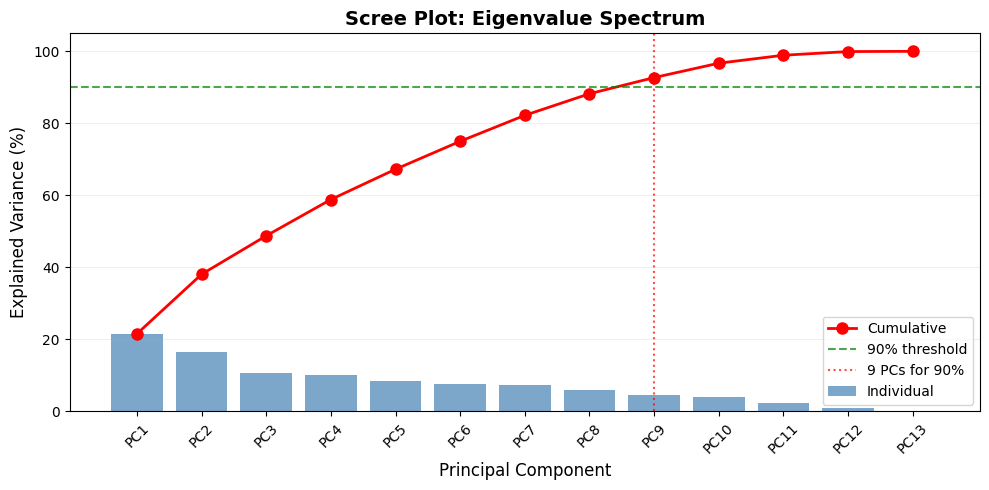

Components needed for 90% variance: 9
Components needed for 95% variance: 9


In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
x=range(1, len(eigenvalues) + 1)
ax.bar(x, explained_variance_ratio * 100, color='steelblue', alpha=0.7, label="Individual")
ax.plot(x, cumulative_variance * 100, 'ro-', linewidth=2, markersize=8, label='Cumulative')

#Mark 90% threshold
ax.axhline(y=90, color='green', linestyle='--', alpha=0.7, label='90% threshold')
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
ax.axvline(x=n_90, color='red', linestyle=':', alpha=0.7, label=f'{n_90} PCs for 90%')

ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Explained Variance (%)', fontsize=12)
ax.set_title('Scree Plot: Eigenvalue Spectrum', fontsize=14, fontweight='bold')
ax.set_xticks(list(x))
ax.set_xticklabels([f'PC{i}' for i in x], rotation=45)
ax.legend()
ax.grid(True, alpha=0.2, axis='y')

plt.tight_layout()
plt.show()

print(f"Components needed for 90% variance: {n_90}")
print(f"Components needed for 95% variance: {np.argmax(cumulative_variance >= 0.95)}")


In [ ]:
#Dynamic principal component selection

def select_components_dynamic(eigenvalues, threshold=0.90):
  """Select minimum PCs needed to reach the variance threshold."""
  total = np.sum(eigenvalues)
  ratios = eigenvalues / total
  cumulative = np.cumsum(ratios)
  n_components = np.argmax(cumulative >= threshold) + 1
  return n_components, cumulative[n_components - 1]

#different thresholds
print("DYNAMIC COMPONENT SELECTION ")
print("=" * 50)
for thresh in [0.80, 0.85, 0.90, 0.95, 0.99]:
  n, var = select_components_dynamic(eigenvalues, thresh)
  print(f"Threshold {thresh*100:.0f}% -> {n} PCs (actual: {var*100:.2f}%)")

#Apply with 90% threshold
n_optimal, var_retained = select_components_dynamic(eigenvalues, 0.90)
V_optimal = eigenvectors[:, :n_optimal]
X_pca_optimal = X_standardized @ V_optimal

print(f"\nOptimal components (90%): {n_optimal}")
print(f"Dimension reduction: {X_standardized.shape[1]} → {n_optimal} features")
print(f"Compression ratio: {X_standardized.shape[1] / n_optimal:.1f}x")


DYNAMIC COMPONENT SELECTION 
Threshold 80% -> 7 PCs (actual: 82.23%)
Threshold 85% -> 8 PCs (actual: 88.23%)
Threshold 90% -> 9 PCs (actual: 92.71%)
Threshold 95% -> 10 PCs (actual: 96.71%)
Threshold 99% -> 12 PCs (actual: 99.94%)

Optimal components (90%): 9
Dimension reduction: 13 → 9 features
Compression ratio: 1.4x


In [ ]:
#Performance Benchmarking

def pca_from_scratch(X, n_components=2):
  """Complete PCA pipeline in one function."""

  #standardize
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0, ddof=0)
  std[std == 0] = 1.0
  X_std = (X - mean) / std

  #covariance
  cov = (1 / X_std.shape[0]) * (X_std.T @ X_std)

  #eigendecomposition
  eigvals, eigvecs = np.linalg.eigh(cov)
  idx = np.argsort(eigvals)[::-1]
  eigvecs = eigvecs[:, idx]

  #project
  return X_std @ eigvecs[:, :n_components]

#benchmark across different dataset sizes
print("BENCHMARK: PCA Runtime vs Dataset Size ")
print("=" * 50)
sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
bench_results = []

for n in sizes:
  X_bench = np.random.randn(n, 13)
  times = []
  for _ in range(3):
    start = time.time()
    pca_from_scratch(X_bench)
    times.append(time.time() - start)
  avg = np.mean(times)
  bench_results.append({'n': n, 'ms': avg * 1000})
  print(f"n={n:>8,} samples -> {avg*1000:.2f} ms")

#benchmark across different feature counts
print(f"\nBENCHMARK: PCA Runtime vs Feature Count (n=5000)")
print("=" * 55)
feat_results = []

for nf in [5, 10, 20, 50, 100, 200]:
  X_bench = np.random.randn(5000, nf)
  times = []
  for _ in range(3):
    start = time.time()
    pca_from_scratch(X_bench, n_components=min(2, nf))
    times.append(time.time() - start)
  avg = np.mean(times)
  feat_results.append({'nf': nf, 'ms': avg * 1000})
  print(f"features={nf:>4} -> {avg*1000:.2f} ms")


BENCHMARK: PCA Runtime vs Dataset Size 
n=     100 samples -> 1.52 ms
n=     500 samples -> 0.88 ms
n=   1,000 samples -> 0.55 ms
n=   5,000 samples -> 1.75 ms
n=  10,000 samples -> 2.93 ms
n=  50,000 samples -> 26.20 ms
n= 100,000 samples -> 56.24 ms

BENCHMARK: PCA Runtime vs Feature Count (n=5000)
features=   5 -> 1.27 ms
features=  10 -> 1.91 ms
features=  20 -> 2.56 ms
features=  50 -> 8.12 ms
features= 100 -> 15.66 ms
features= 200 -> 36.14 ms


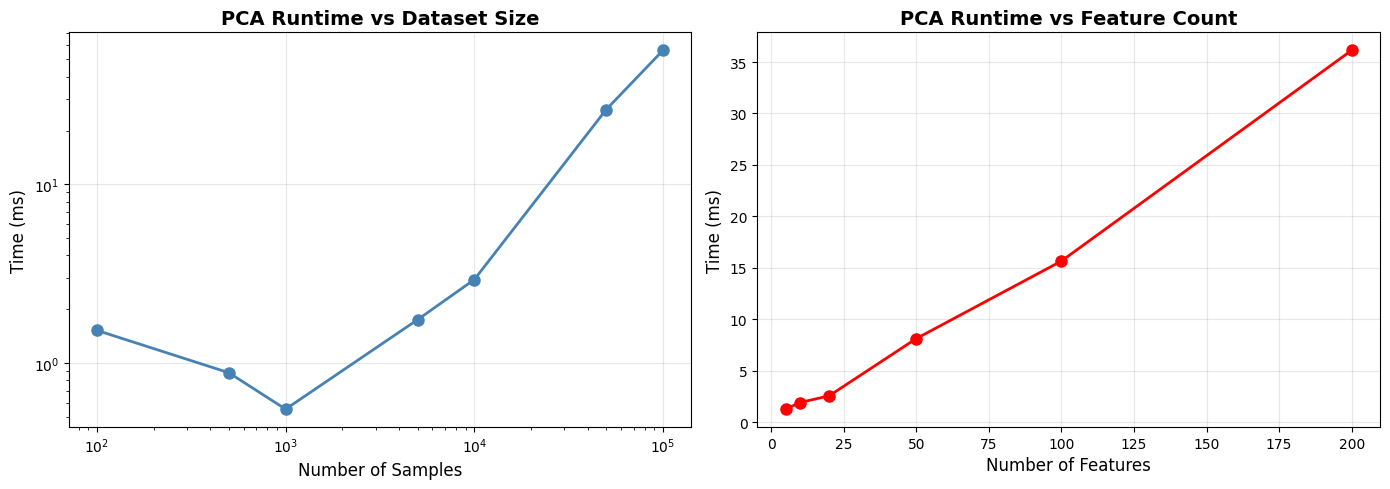

Runtime complexity: 0(n*d^2)
  - Covariance computation dominates for large n (samples)
  - Eigendecomposition dominates for large d (features)


In [ ]:
#Benchmark visualization
fig, axes = plt.subplots(1,2,figsize=(14,5))

#Time vs sample size
axes[0].plot([r['n'] for r in bench_results], [r['ms'] for r in bench_results], 'o-', color='steelblue', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Samples', fontsize=12)
axes[0].set_ylabel('Time (ms)', fontsize=12)
axes[0].set_title('PCA Runtime vs Dataset Size', fontsize=14, fontweight='bold')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3)

#Time vs feature count
axes[1].plot([r['nf'] for r in feat_results], [r['ms'] for r in feat_results], 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Features', fontsize=12)
axes[1].set_ylabel('Time (ms)', fontsize=12)
axes[1].set_title('PCA Runtime vs Feature Count', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Runtime complexity: 0(n*d^2)")
print("  - Covariance computation dominates for large n (samples)")
print("  - Eigendecomposition dominates for large d (features)")